### Classification from fashion MNIST dataset.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

So this worked out. Now it's time to create and run a keras model. Since MNIST is getting boring, let's use the fashion MNIST dataset. If you want to learn more on the data set check out the following links

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)  
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

So in a nutsthell, MNIST contains 60000 28x28 pixel grey scale images of handwritten digits between 0-9 and the corresponding labels. Plus additional 10000 images for testing.

Fashing MNIST contains 60000 28x28 pixel grey scale images of fashion articles and the corresponding labels between 0-9. It also contains 10000 test images.

Luckyly, this data set is built in to Keras, so let's load it:

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

0


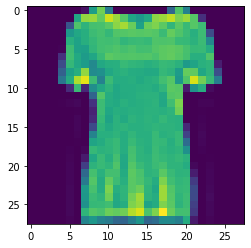

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
i = 10
print(train_labels[i])
plt.imshow(train_images[i])

As expected, we get 60000 images of 28 by 28 pixels:

In [5]:
train_images.shape

(60000, 28, 28)

The labels are simply a list of 60000 elements, each one is a number (label) between 0 and 9:

In [6]:
print(train_labels.shape)
print(train_labels)

(60000,)
[9 0 0 ... 3 0 5]


Let's have a look at one image:

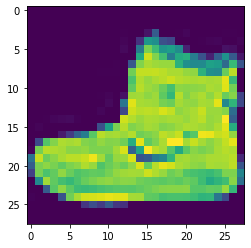

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()


So this is obviously a shoe :) - Let's normalize the data by making sure every pixel value is between 0..1; this is easy in this case:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In order to write our **hello world** softmax regression model, the following code does the job. If you are familiar with Keras, this is really basic stuff. There is only one catch. The following code doesn't run since the latest stable Keras version is incompatible with the alpha release of TensorFlow 2.0. So the following code is for illustration purposes only. Don't run it, it will destroy your hard drive.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4976 - accuracy: 0.8241 - val_loss: 0.4204 - val_accuracy: 0.8501
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8634 - val_loss: 0.3844 - val_accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3380 - accuracy: 0.8767 - val_loss: 0.3871 - val_accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3134 - accuracy: 0.8858 - val_loss: 0.3562 - val_accuracy: 0.8708
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8908 - val_loss: 0.3701 - val_accuracy: 0.8681
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8965 - val_loss: 0.3524 - val_accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9007 - val_loss: 0.3514 - val_accuracy:

In [11]:
score = model.evaluate(test_images, test_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 0s 836us/step - loss: 0.3470 - accuracy: 0.8793
Test loss:  0.3469761610031128
Test accuracy:  0.8792999982833862


As you can see, we didn't change the Keras code at all, but now all imports are coming from the tensorflow package. I felt a bit bad when I've noticed that TensorFlow has eaten up Keras, but in reality, nobody uses a Keras runtime other then TensorFlow anyway, so it doesn't really matter. Just be aware that Keras is Google now and part of TensorFlow. In the next notebook, we'll cover the stategies for parallel training. So stay tuned.

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,
        #      optimizer=keras.optimizers.Adadelta(),
     #         metrics=['accuracy'])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 54s 116ms/step - loss: 0.5122 - accuracy: 0.8172 - val_loss: 0.3263 - val_accuracy: 0.8795
Epoch 2/12
469/469 [==============================] - 57s 122ms/step - loss: 0.3332 - accuracy: 0.8810 - val_loss: 0.2801 - val_accuracy: 0.8977
Epoch 3/12
469/469 [==============================] - 57s 123ms/step - loss: 0.2822 - accuracy: 0.8988 - val_loss: 0.2524 - val_accuracy: 0.9068
Epoch 4/12
469/469 [==============================] - 55s 117ms/step - loss: 0.2522 - accuracy: 0.9087 - val_loss: 0.2396 - val_accuracy: 0.9086
Epoch 5/12
469/469 [==============================] - 59s 125ms/step - loss: 0.2284 - accuracy: 0.9167 - val_loss: 0.2259 - val_accuracy: 0.9162
Epoch 6/12
469/469 [==============================] - 58s 123ms/step - loss: 0.2129 - accuracy: 0.9216 - val_loss: 0.2219 - val_accuracy: 0.9181
Epoch 7/12
469/469 [==============================] - 60s 127ms/step - loss: 0.1959 - accuracy: 0.9278 - val_loss: 0.2164 - val_ac

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [14]:
# save full model (architecture + weights)
model.save("model_fashion_mnist.h5")